# Author :- Anand Kumar
## Data Science and Business Analytics Intern
## GRIP - The Spark Foundation

###  Task 3: Exploratory Data Analysis - Retail
#### (Perform ‘Exploratory Data Analysis’ on dataset 'SampleSuperstore'. As a business manager, try to find out the weak areas where you can work to make more profit.)

In [1]:
import numpy as np                  #importing the prerequisite libraries
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('SampleSuperstore.csv')   #Importing dataset

In [3]:
data.head()    # first 5 rows

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.shape  #shape of data

(9994, 13)

In [5]:
data.isnull().sum()    #Check for missing value

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
columns = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']
for column in columns:
    print(column)
    print(data[column].value_counts())
    print()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

Country
United States    9994
Name: Country, dtype: int64

City
New York City        915
Los Angeles          747
Philadelphia         537
San Francisco        510
Seattle              428
Houston              377
Chicago              314
Columbus             222
San Diego            170
Springfield          163
Dallas               157
Jacksonville         125
Detroit              115
Newark                95
Richmond              90
Jackson               82
Columbia              81
Aurora                68
Phoenix               63
Long Beach            61
Arlington             60
San Antonio           59
Miami                 57
Louisville            57
Rochester             53
Charlotte             52
Henderson             51
Lakewood              49
Lancas

In [9]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


###  Pie Chart for Sub-Category

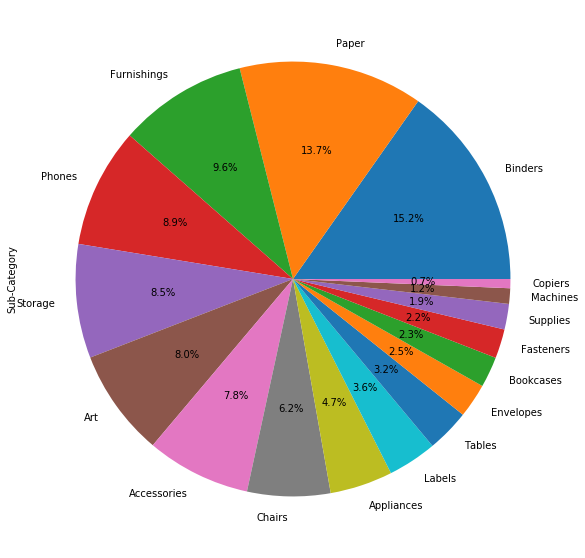

In [10]:
plt.figure(figsize=(10,10))
data['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")

###  State wise Sales

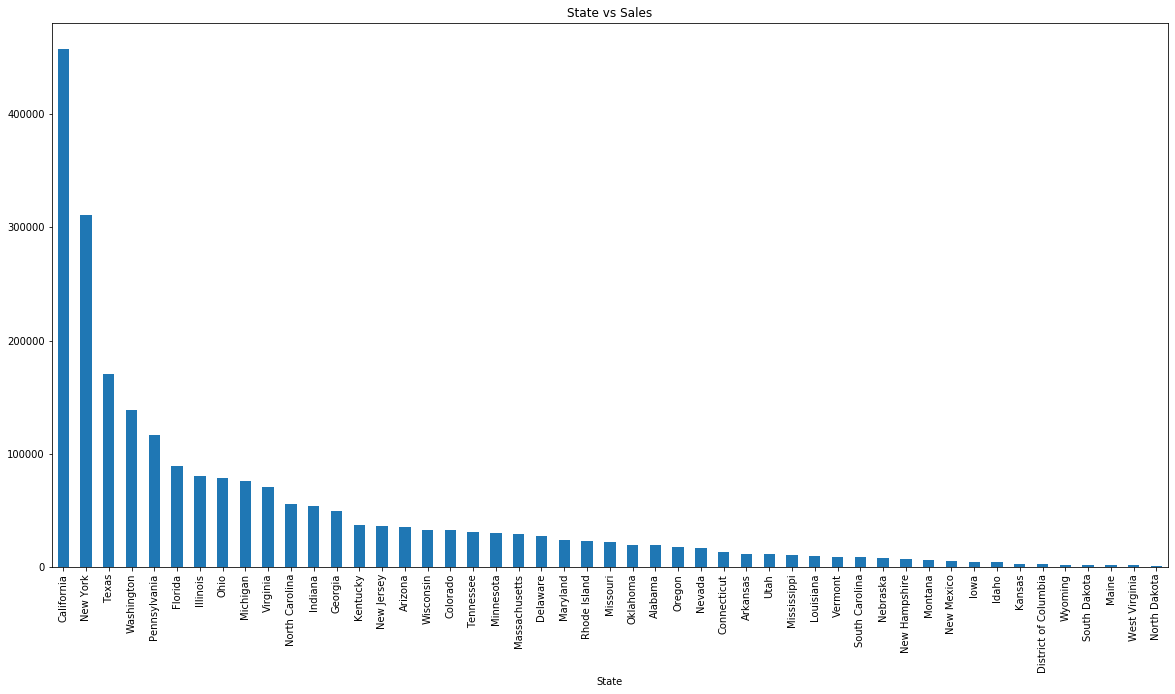

In [11]:
statewise_sales = data.groupby(['State'])['Sales'].sum()
statewise_sales.sort_values(ascending=False,inplace=True)
fig, ax = plt.subplots(figsize=(20,10))
plt.title('State vs Sales')
statewise_sales.plot.bar()

###  State wise Profit

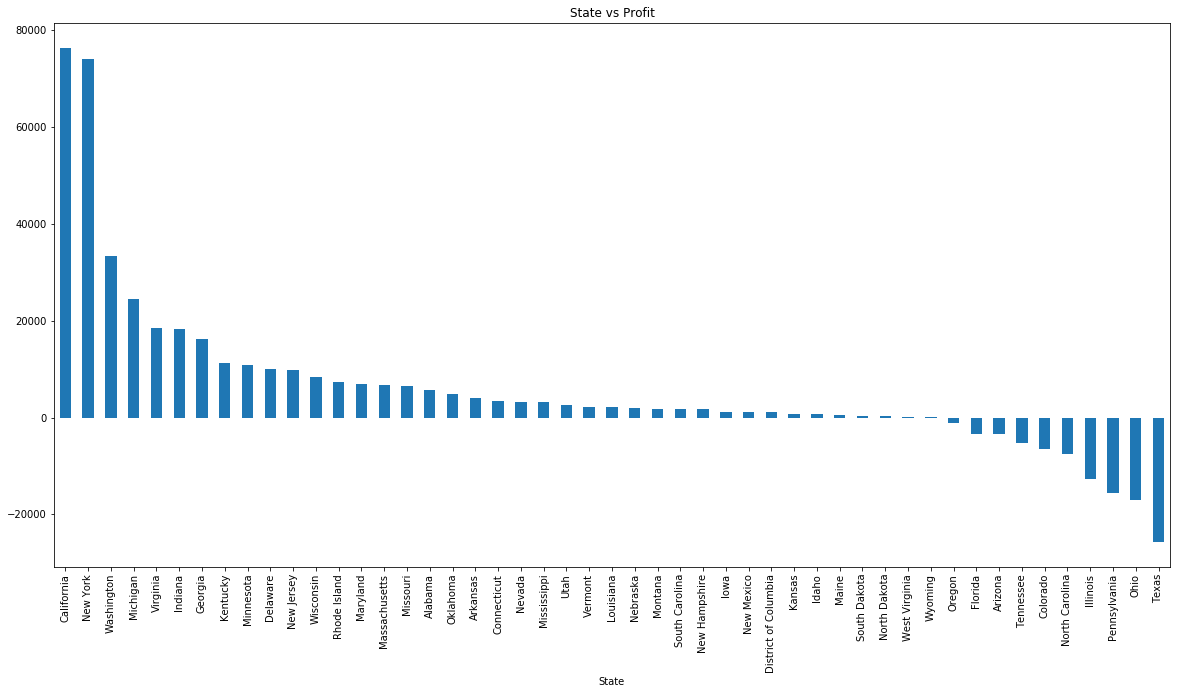

In [12]:
statewise_profit = data.groupby(['State'])['Profit'].sum()
statewise_profit.sort_values(ascending=False,inplace=True)
fig, ax = plt.subplots(figsize=(20,10))
plt.title("State vs Profit")
statewise_profit.plot.bar()

###  Sub-Category wise Profit

Text(0.5, 1.0, 'Sub Category Vs Sales')

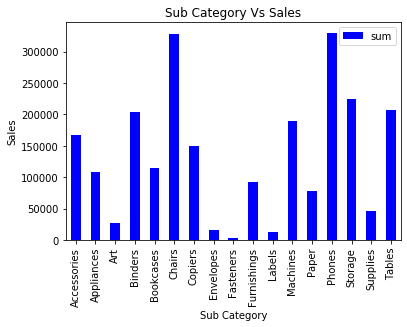

In [13]:
data.groupby('Sub-Category')['Sales'].agg(['sum']).plot.bar(color='b')
plt.xlabel('Sub Category')
plt.ylabel('Sales')
plt.title('Sub Category Vs Sales')

###  Category wise Sales and Profit 

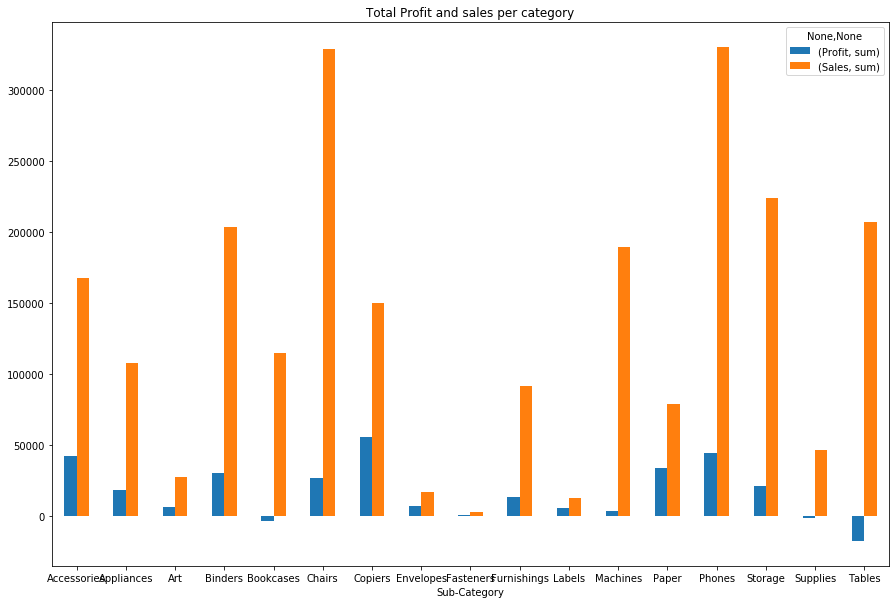

In [14]:
Categorywise_Sales_Profit = data.groupby('Sub-Category')['Profit','Sales'].agg(['sum'])
Categorywise_Sales_Profit.plot.bar(rot=0, title="Total Profit and sales per category",figsize=(15,10))
plt.show(block=True)

###  Compare Discount rate with Profit

Text(0.5, 1.0, 'Discount Vs Profit')

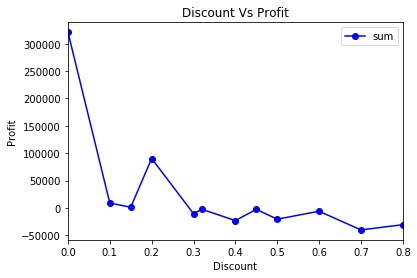

In [15]:
data.groupby('Discount')['Profit'].agg(['sum']).plot(color = 'b', marker = 'o')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Discount Vs Profit')

## Result

In [16]:
#Stores in Texas, Pennsylvania, Florida, Illinios, Ohio, North Carolina, Arizona, Tennessee are running in loss.
#People from Western region are buying more goods than any other reagion.
#Products like copiers, phones and accessories plays massive roles in company profit. Even though furniture items like tables and chairs are sold in high number, when it comes to profit these are not profitable for the company.
#Since, highest discount rates have the lowest profit. So, Companies profit can be inceased by reducing the discount rates of those respective items.